## Open Landsat .tif Files in Python


In [2]:
# Import ncessary packages
import os
from glob import glob

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import numpy as np
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from shapely.geometry import mapping

# Download data and set working directory
data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [3]:
# Define the file path
landsat_post_fire_path = os.path.join("cold-springs-fire",
                                      "landsat_collect",
                                      "LC080340322016072301T1-SC20180214145802",
                                      "crop")

glob(os.path.join(landsat_post_fire_path, '*'))

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_pixel_qa_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_radsat_qa_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_aerosol_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_0

In [5]:
# Grab bands 2 through band 5
all_landsat_post_bands = glob(os.path.join(landsat_post_fire_path, "*band[2-5]*.tif"))

all_landsat_post_bands

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [7]:
# sort bands
all_landsat_post_bands.sort()
all_landsat_post_bands

['cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire\\landsat_collect\\LC080340322016072301T1-SC20180214145802\\crop\\LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif']

In [8]:
def open_clean_band(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An single xarray object with the Landsat band data.

    """

    return rxr.open_rasterio(band_path, masked=True).squeeze()

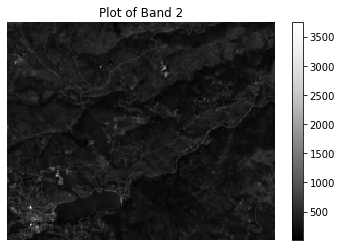

In [11]:
# Plot band 2
landsat_post_xr = open_clean_band(all_landsat_post_bands[0])

f, ax = plt.subplots()
landsat_post_xr.plot.imshow(ax =ax,
                           cmap="Greys_r")
ax.set_title("Plot of Band 2")
ax.set_axis_off()
plt.show()

In [ ]:
# Open up boundary extent using GeoPandas
